In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
trainset = datasets.FashionMNIST(
    root = './data',
    train = True,
    download = True,
    transform = transform
)

testset = datasets.FashionMNIST(
    root = './data',
    train = False,
    download = True,
    transform = transform
)

In [5]:
batch_size = 16

train_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size
)

test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size
)

In [6]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

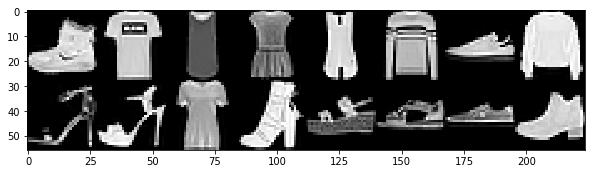

In [7]:
img = utils.make_grid(images, padding=0)
npimg = img.numpy()

plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [8]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [9]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


In [10]:
for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


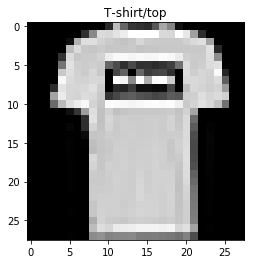

In [11]:
idx = 1
item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
plt.imshow(item_npimg, cmap='gray')
plt.show()

In [14]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

In [15]:
EPOCHS = 30
BATCH_SIZE = 64

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [17]:
model = Net().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [18]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send training data to DEVICE memory
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [19]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [20]:
for epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.5668, Accuracy: 79.91%
[2] Test Loss: 0.4869, Accuracy: 82.50%
[3] Test Loss: 0.4478, Accuracy: 84.01%
[4] Test Loss: 0.4221, Accuracy: 84.84%
[5] Test Loss: 0.4022, Accuracy: 85.62%
[6] Test Loss: 0.3910, Accuracy: 86.15%
[7] Test Loss: 0.3798, Accuracy: 86.52%
[8] Test Loss: 0.3710, Accuracy: 86.83%
[9] Test Loss: 0.3641, Accuracy: 86.93%
[10] Test Loss: 0.3588, Accuracy: 87.25%
[11] Test Loss: 0.3538, Accuracy: 87.32%
[12] Test Loss: 0.3498, Accuracy: 87.54%
[13] Test Loss: 0.3462, Accuracy: 87.80%
[14] Test Loss: 0.3447, Accuracy: 87.86%
[15] Test Loss: 0.3422, Accuracy: 87.94%
[16] Test Loss: 0.3408, Accuracy: 88.06%
[17] Test Loss: 0.3392, Accuracy: 88.21%
[18] Test Loss: 0.3368, Accuracy: 88.42%
[19] Test Loss: 0.3375, Accuracy: 88.27%
[20] Test Loss: 0.3379, Accuracy: 88.39%
[21] Test Loss: 0.3370, Accuracy: 88.49%
[22] Test Loss: 0.3372, Accuracy: 88.45%
[23] Test Loss: 0.3379, Accuracy: 88.59%
[24] Test Loss: 0.3366, Accuracy: 88.60%
[25] Test Loss: 0.3389, A